In [538]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
from uncertainties import ufloat
from uncertainties.umath import *
import astropy.units as u
from scipy import constants


In [539]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-dark-palette')

/tmp/ipykernel_89348/1667230561.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [540]:
plt.rcParams["figure.figsize"]=8,6
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'serif'})

## Datos

In [541]:
#exoplanets = pd.read_csv('./data/exoplanetas_julio_22.csv')
exoplanets_rmp = pd.read_csv('./data/exoplanets_rmp_sep10_23.csv') # with P, M and R determined
exoplanets = pd.read_csv('./data/exoplanets_sep10_23.csv') # all, uso esta porque comprobé que filtrando por P, M y R no se pierde nada

In [542]:
# nuestros planetas
radio_1199 = [0.938*u.R_jup, 0.025*u.R_jup]
radio_1273 = [0.99*u.R_jup, 0.22*u.R_jup]
masa_1199 = [0.239*u.M_jup, 0.020*u.M_jup]
masa_1273 = [0.222*u.M_jup, 0.015*u.M_jup]
dens_1199 = [0.358, 0.041]
dens_1273 = [0.28, 0.11]
met_1199 = [0.44, 0.04]
met_1273 = [0.07, 0.04]
age_1199 = [4.2, 0.2]
age_1273 = [3.1, 1.6]

In [543]:
radio_1273[0].to(u.R_earth)

<Quantity 11.09689092 earthRad>

In [544]:
0.015/0.223*100

6.726457399103139

In [545]:
print(len(exoplanets))
print(len(exoplanets_rmp))

5514
1111


In [546]:
exoplanets.columns

Index(['pl_name', 'default_flag', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim',
       'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim',
       'pl_bmassprov', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_mas

In [547]:
parecidos = exoplanets[exoplanets.pl_orbper >= 1.0]
parecidos = parecidos[parecidos.pl_orbper <= 10.0]
parecidos = parecidos[parecidos.pl_masse >= 60.0]
parecidos = parecidos[parecidos.pl_masse <= 100.0]
parecidos = parecidos[parecidos.pl_masseerr1/parecidos.pl_masse <= 0.20]
parecidos = parecidos[parecidos.pl_masseerr2/parecidos.pl_masse >= -0.20]
parecidos = parecidos[parecidos.pl_radeerr1/parecidos.pl_rade <= 0.20]
parecidos = parecidos[parecidos.pl_radeerr2/parecidos.pl_rade >= -0.20]
parecidos.shape

(28, 90)

In [548]:
parecidos.pl_name

116        CoRoT-8 b
318       HAT-P-12 b
326       HAT-P-18 b
327       HAT-P-19 b
348       HAT-P-38 b
362       HAT-P-51 b
425      HATS-48 A b
427         HATS-5 b
4756       NGTS-12 b
4771        NGTS-5 b
4964      TOI-1268 b
4970      TOI-1296 b
5027      TOI-1842 b
5034      TOI-2000 c
5089      TOI-2567 b
5116      TOI-3629 b
5120      TOI-3757 b
5173       TOI-532 b
5291      WASP-131 b
5305      WASP-147 b
5306      WASP-148 b
5317    WASP-160 B b
5340      WASP-181 b
5353       WASP-20 b
5354       WASP-21 b
5371       WASP-39 b
5407       WASP-69 b
5424       WASP-83 b
Name: pl_name, dtype: object

In [549]:
parecidos.loc[5371].pl_radj

1.27

In [550]:
# count how many objets have pl_dens<0.5 and pl_rade<11.5

sum((exoplanets_rmp.pl_dens<0.5) & (exoplanets_rmp.pl_rade <11.5))



48

In [551]:
masas = np.linspace(50,110, 1000)
densidades=np.asarray([0.1,0.5,1.0,1.5,2.0, 1000])
cambio_de_unid = 1/0.01747765891
densidades = densidades*cambio_de_unid
radios1 = (3/(4*np.pi)*masas/densidades[0])**(1/3)
radios2 = (3/(4*np.pi)*masas/densidades[1])**(1/3)
radios3 = (3/(4*np.pi)*masas/densidades[2])**(1/3)
radios4 = (3/(4*np.pi)*masas/densidades[3])**(1/3)
radios5 = (3/(4*np.pi)*masas/densidades[4])**(1/3)
radios6 = (3/(4*np.pi)*masas/densidades[5])**(1/3)


In [552]:
#OTEGI 2020 M-R relation
def r_otegi(m):
    rr = ufloat(0.70, 0.11)
    constant = ufloat(0.63,0.04)
    rotegi = rr*m**(constant)*u.R_earth.to(u.R_jup)
    return rotegi
radios7 = []
radios7err = []
for i in range(len(masas)):
    radios7.append(r_otegi(masas[i]).n)
    radios7err.append(r_otegi(masas[i]).s)

def m_otegi(r):
    mm = ufloat(1.74, 0.38)
    constant = ufloat(1.58,0.10)
    m_ote = mm*(r*u.R_jup.to(u.R_earth))**(constant)
    return m_ote
radios = np.linspace(0.1,2,100)
masas7 = []
masas7err = []
for i in range(len(radios)):
    masas7.append(m_otegi(radios[i]).n)
    masas7err.append(m_otegi(radios[i]).s)


/tmp/ipykernel_89348/348452280.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='pl_masse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


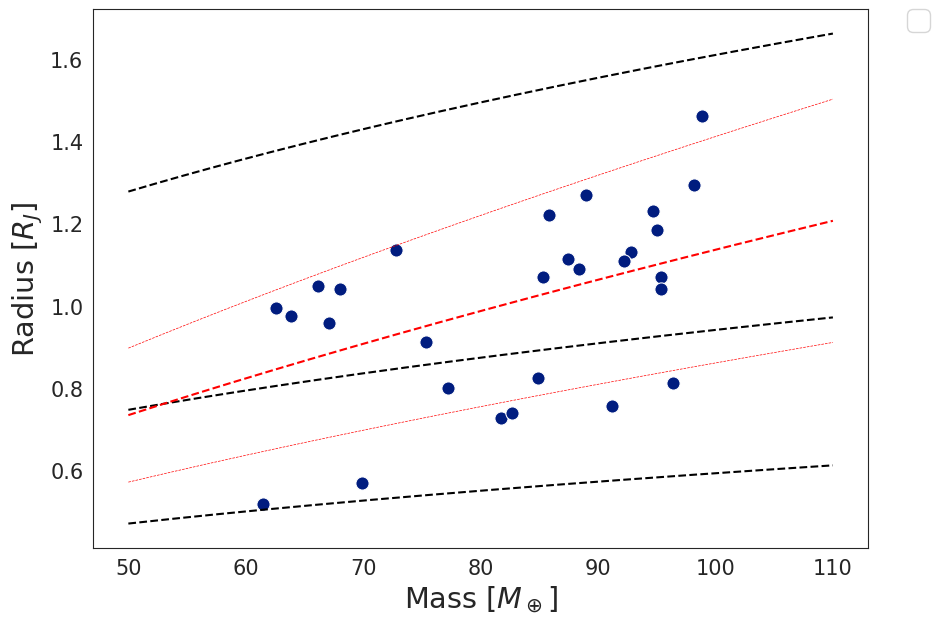

In [553]:
figure = plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.scatterplot(x='pl_masse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-large')
plt.xlabel('Mass [$M_\oplus$]', fontsize='xx-large')
plt.ylabel('Radius [$R_J$]', fontsize='xx-large')

plt.plot(masas, radios1, color='black', label='Density = 0.1', linestyle="--")
plt.plot(masas, radios2, color='black', label='Density = 0.5', linestyle="--")
plt.plot(masas, radios7, color='red', label='Otegi M-R relation', linestyle="--")
plt.plot(masas, np.asarray(radios7)-np.asarray(radios7err), color='red', linestyle="--", lw=0.5)
plt.plot(masas, np.asarray(radios7)+np.asarray(radios7err), color='red', linestyle="--", lw=0.5)
#plt.plot(masas,radios3, color='red', label='Density = 100')
#plt.plot(masas,radios4, color='black', label='Density = 1.5')
plt.plot(masas,radios5, color='black', label='Density = 2.0', linestyle="--")
#plt.plot(masas,radios6, color='red', label='Density = 5')
# plt.xlim(60,100)
#plt.ylim(0.1,1.5)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15)

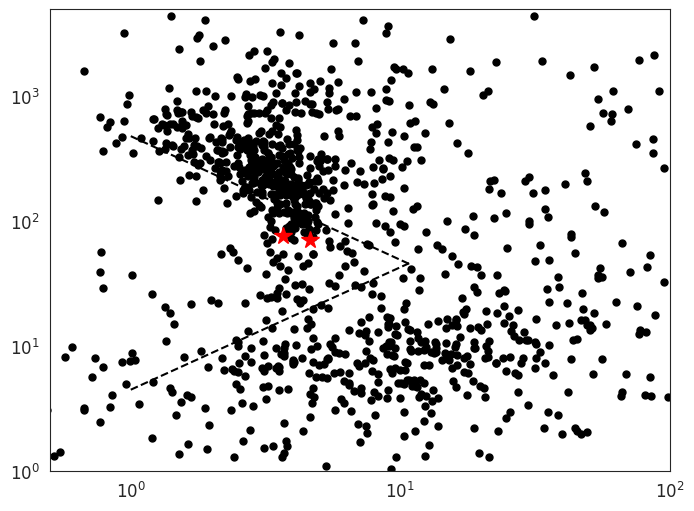

In [554]:
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,11,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_masse'], 'o', color='black', markersize=5)
plt.plot(x, 10**des1(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot(x, 10**des2(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot([3.67], [masa_1199[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [masa_1273[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5,100)
plt.ylim(1,5000)
plt.show()

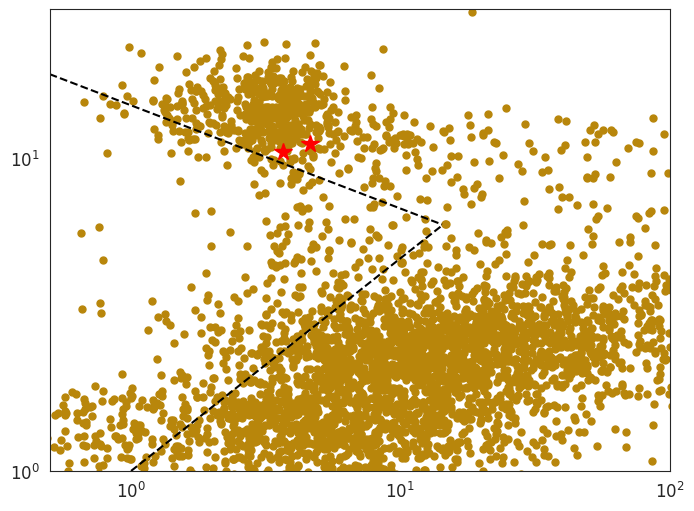

In [555]:
#neptunian desert in Period radius diagram
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(0.5,14.3,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_rade'], 'o', color='C4', markersize=5)
plt.plot(x, 10**des3(np.log10(x)), color='black', linestyle='--')
plt.plot(x, 10**des4(np.log10(x)), color='black', linestyle='--')
plt.plot([3.67], [radio_1199[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [radio_1273[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5, 100)
plt.ylim(1, 30)
plt.show()

## Desert

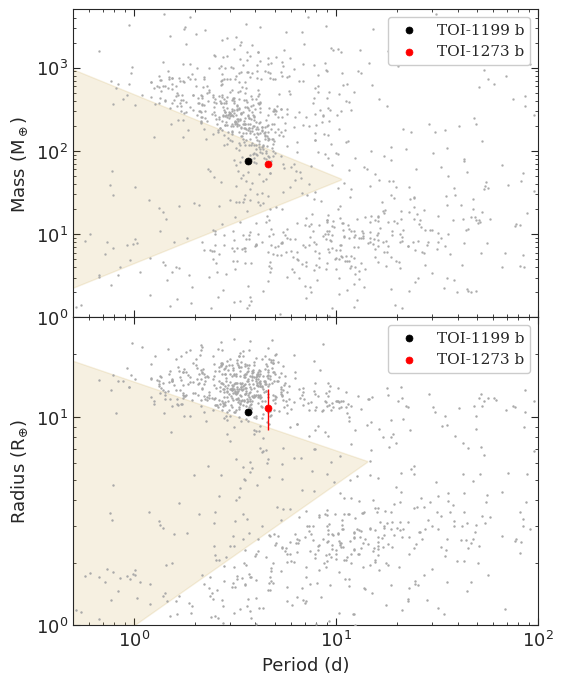

In [556]:
fig, axes = plt.subplots(2, sharex=True, sharey=False, figsize=(6,8))
fig.subplots_adjust(hspace=0)

x1=np.linspace(0.5,10.6,200)
y1=10**des1(np.log10(x1))*317.907
y2=10**des2(np.log10(x1))*317.907

axes[0].plot(exoplanets_rmp['pl_orbper'], exoplanets_rmp['pl_masse'], '.', markerfacecolor='darkgray', color='darkgray', markersize=1.5, alpha=0.9, zorder=9)
axes[0].scatter(3.67, masa_1199[0].to(u.M_earth).value, marker="o", edgecolors='k', linewidths=0.5, s=25, c='k', label='TOI-1199 b', zorder=10) #c='mediumturquoise
axes[0].scatter(4.63, masa_1273[0].to(u.M_earth).value, marker="o", edgecolors='r', linewidths=0.5, s=25, c='r', label='TOI-1273 b', zorder=10) #c='mediumseagreen'
#add errorbars
axes[0].errorbar(3.67, masa_1199[0].to(u.M_earth).value, yerr=masa_1199[1].to(u.M_earth).value, fmt='none', ecolor='k', elinewidth=1, capsize=0, zorder=10)
axes[0].errorbar(4.63, masa_1273[0].to(u.M_earth).value, yerr=masa_1273[1].to(u.M_earth).value, fmt='none', ecolor='r', elinewidth=1, capsize=0, zorder=10)

axes[0].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(0.5,100)
axes[0].set_ylim(1,5000)
axes[0].set_ylabel('Mass (M$_\oplus$)', fontsize=13)
axes[0].fill_between(x1, y1, y2, color='C4', alpha=0.12)
axes[0].legend(loc='upper right', fontsize=11, framealpha=1, frameon=True,  prop=dict(family='serif', weight='normal', size=11)).set_zorder(11) 

x2=np.linspace(0.5,14.3,200)
y3=10**des3(np.log10(x2))
y4=10**des4(np.log10(x2))
axes[1].plot(exoplanets_rmp['pl_orbper'], exoplanets_rmp['pl_rade'], '.', markerfacecolor='darkgray', color='darkgray', markersize=1.5, alpha=1, zorder=9)
axes[1].scatter(3.67, radio_1199[0].to(u.R_earth).value, marker='o', edgecolors='k', linewidths=0.5, s=25, c='k', label='TOI-1199 b', zorder=10)
axes[1].scatter(4.63, radio_1273[0].to(u.R_earth).value, marker='o', edgecolors='r', linewidths=0.5, s=25, c='r', label='TOI-1273 b', zorder=10)
# add errorbars
axes[1].errorbar(3.67, radio_1199[0].to(u.R_earth).value, yerr=radio_1199[1].to(u.R_earth).value, fmt='none', ecolor='k', elinewidth=1, capsize=0, zorder=10)
axes[1].errorbar(4.63, radio_1273[0].to(u.R_earth).value, yerr=radio_1273[1].to(u.R_earth).value, fmt='none', ecolor='r', elinewidth=1, capsize=0, zorder=10)
axes[1].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(0.5, 100)
axes[1].set_ylim(1, 30)
axes[1].set_xlabel('Period (d)', fontsize=13)
axes[1].set_ylabel('Radius (R$_{\oplus}$)', fontsize=13)
axes[1].fill_between(x2, y3, y4, color='C4', alpha=0.12)
axes[1].legend(loc='upper right', framealpha=1, frameon=True,  prop=dict(family='serif', weight='normal', size=11)).set_zorder(11) 
#plt.savefig('desert_plot.png', dpi=300, bbox_inches='tight', facecolor='white')

In [557]:
len(exoplanets)

5514

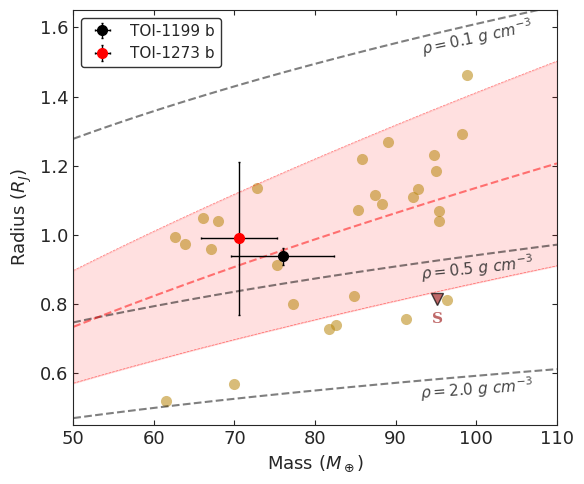

In [558]:
from curses.panel import bottom_panel

plt.figure(figsize=(6, 5))
plt.plot(parecidos['pl_masse'], parecidos['pl_radj'], 'o', color='C4', ms=8, 
        markeredgecolor='k', markeredgewidth=0, alpha=0.55)
plt.xlabel('Mass ($M_\oplus$)', fontsize=13)
plt.ylabel('Radius ($R_J$)', fontsize=13)
plt.plot(masas, radios1, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios2, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios5, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios7, color='red', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, np.asarray(radios7)+np.asarray(radios7err), color='red', linewidth=0.5, linestyle="--", alpha=0.5)
plt.plot(masas, np.asarray(radios7)-np.asarray(radios7err), color='red', linewidth=0.5, linestyle="--", alpha=0.5)
plt.fill_between(masas, np.asarray(radios7)-np.asarray(radios7err), np.asarray(radios7)+np.asarray(radios7err), color='red', alpha=0.12)
plt.errorbar([masa_1199[0].to(u.M_earth).value], [radio_1199[0].value], marker='o', ls='none', ms=7, color='k', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1199[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI-1199 b')

plt.errorbar([masa_1273[0].to(u.M_earth).value], [radio_1273[0].value], marker='o', ls='none', ms=7, color='r', 
             xerr=[masa_1273[1].to(u.M_earth).value], yerr=[radio_1273[1].value], 
            markeredgecolor='r', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI-1273 b')

plt.plot([95.16], [0.8145], marker='v', ls='none', ms=8, color='brown', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
plt.text(94.53, 0.745, 'S', fontsize=11, alpha=0.7,  weight='bold', fontfamily='serif', style='normal',  color='brown')

plt.tick_params(axis='both', labelsize=15)
plt.text(93, 1.52, r'$\rho = 0.1 ~g~ cm^{-3}$', fontsize=11, rotation=12, alpha=0.85)
plt.text(93, 0.87, r'$\rho = 0.5 ~g~ cm^{-3}$', fontsize=11, rotation=6, alpha=0.85)
plt.text(93, 0.525, r'$\rho = 2.0 ~g~ cm^{-3}$', fontsize=11, rotation=4, alpha=0.85)

plt.tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
plt.xlim(50,110)
plt.ylim(0.45,1.65)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=11, frameon=True, edgecolor='k', fancybox=True, markerscale=1)
#plt.savefig('density_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [559]:
len(parecidos)

28

# Histogram

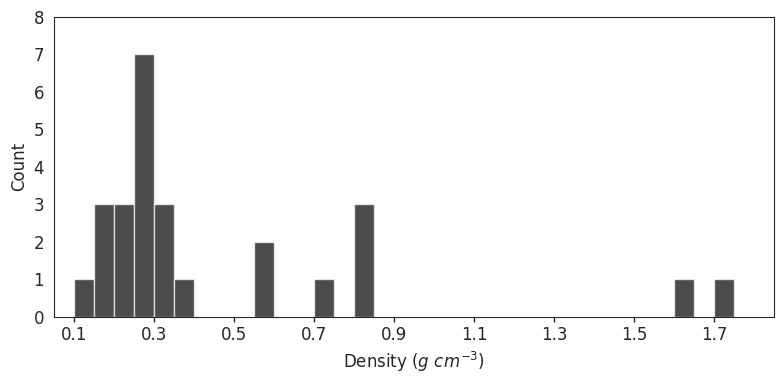

In [560]:
plt.figure(figsize=(8, 4))
plt.hist(parecidos.pl_dens, bins=np.arange(0.0, 1.9, 0.05), histtype='bar', color='k', alpha=0.7) ##8EBA42
plt.xlabel('Density ($g~cm^{-3}$)')
plt.tick_params(axis='both', bottom=True, left=False, direction='out', width=1)
plt.xticks(np.arange(0.1, 1.8, 0.2))
plt.xlim(0.05, 1.85)
#plt.yticks([])
plt.ylim(0, 8)
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('density_hist.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [561]:
len(parecidos)

28

In [562]:
exoplanets.columns

Index(['pl_name', 'default_flag', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim',
       'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim',
       'pl_bmassprov', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_mas

(0.0, 2.0)

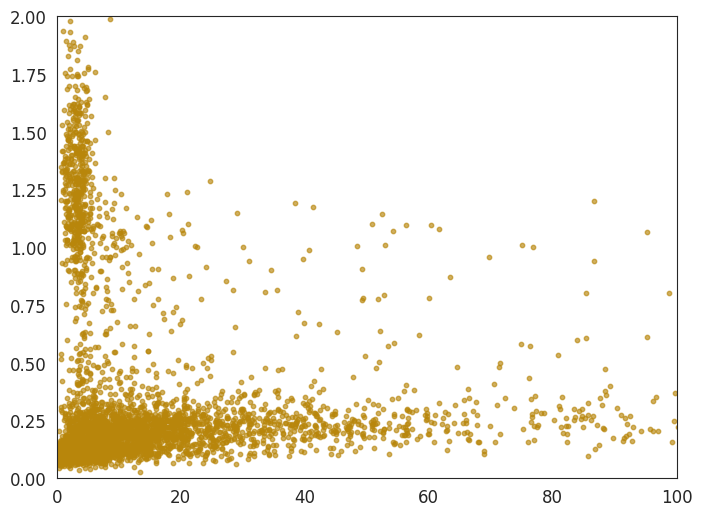

In [563]:
plt.scatter(exoplanets['pl_orbper'], exoplanets['pl_radj'], s=10, color='C4', alpha=0.65)
plt.xlim(0, 100)
plt.ylim(0, 2)

# BIS vs RVs    

In [564]:
data_11 = pd.read_table('./data/rvs/1199_final_rvs.dat', sep='\s+')
data_11.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_11 = np.array((data_11.rv-data_11.rv.mean())*1000)
yerr_rv_11 = np.array(data_11.err*1000)

data_12 = pd.read_table('./data/rvs/1273_final_rvs.dat', sep='\s+')
data_12.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_12 = np.array((data_12.rv-data_12.rv.mean())*1000)
yerr_rv_12 = np.array(data_12.err*1000)

In [565]:
print(data_11.bjd.min(), data_11.bjd.max())
print(data_12.bjd.min(), data_12.bjd.max())

58856.67683 59749.39015
58887.60797 59787.39647


In [566]:
# pearson coefficients between RVs and BIS
pearson_1199 = np.corrcoef(data_11.bis, data_11.rv)[0,1]
print(pearson_1199)
pearson_1273 = np.corrcoef(data_12.bis, data_12.rv)[0,1]
print(pearson_1273)


-0.02816499752996176
-0.060349928197486344


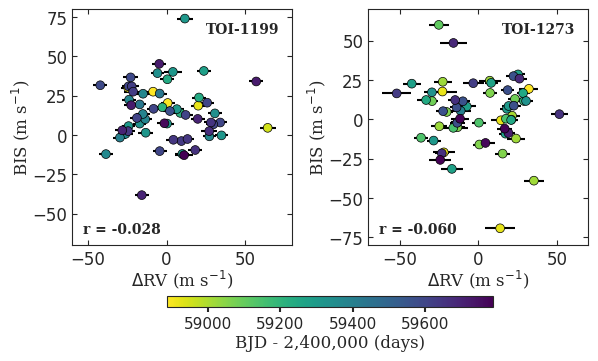

In [618]:
#fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
fig, axes = plt.subplots(ncols=2, figsize=(7, 4.375))
fig.subplots_adjust(wspace=0.20)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
g = axes[0].scatter(y_rv_11, data_11.bis*1e3, c=data_11.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI-1199')
axes[0].errorbar(y_rv_11, data_11.bis*1e3, xerr=yerr_rv_11, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[0].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=12, fontfamily='serif')
axes[0].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=12, fontfamily='serif')
axes[0].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'semibold', 'size':'10', 'family':'serif'})
g = axes[1].scatter(y_rv_12, data_12.bis*1e3, c=data_12.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI-1273')
axes[1].errorbar(y_rv_12, data_12.bis*1e3, xerr=yerr_rv_12, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[1].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=12, fontfamily='serif')
axes[1].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=12, fontfamily='serif')
axes[1].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'demibold', 'size':'10', 'family':'serif'})
axes[0].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=12)
axes[1].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=12)
for label in axes[0].get_xticklabels():
    label.set_fontweight('roman')
axes[0].set_xlim(-60, 80)
axes[0].set_ylim(-70, 80)
axes[1].set_xlim(-70, 70)
axes[1].set_ylim(-80, 70)
# show pearson coefficients in the plot at the bottom left
axes[0].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1199), transform=axes[0].transAxes, fontsize=10, weight='semibold', fontfamily='serif')
axes[1].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1273), transform=axes[1].transAxes, fontsize=10, weight='semibold', fontfamily='serif')
cbar =fig.colorbar(g, location='bottom', ax=axes.ravel().tolist(), shrink=0.6, aspect=30, pad=0.15)
cbar.ax.tick_params(labelsize=11, width=1.5)
cbar.set_label(label='BJD - 2,400,000 (days)', fontsize=12, labelpad=2, fontfamily='serif')
plt.savefig('bisrv_revisado.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

# TSM

In [568]:
# define a function to calculate the Transmission Spectroscopic Metric according to Kempton et al. 2018
# inputs are Rp(r_earth), Teq, Mp(m_earth), Rstar(rsol), mj

def TSM(Rp, Teq, Mp, Rstar, mj):
    # if any entry is NaN, return NaN
    # if np.isnan(Rp) or np.isnan(Teq) or np.isnan(Mp) or np.isnan(Rstar) or np.isnan(mj):
    #     return np.nan
    scale = 1.15
    return scale * Rp**3 * Teq * 10**(-mj/5) / (Mp * Rstar**2)


In [569]:
Rp_1199 = ufloat(radio_1199[0].to(u.R_earth).value, radio_1199[1].to(u.R_earth).value)
Rp_1273 = ufloat(radio_1273[0].to(u.R_earth).value, radio_1273[1].to(u.R_earth).value)
Mp_1199 = ufloat(masa_1199[0].to(u.M_earth).value, masa_1199[1].to(u.M_earth).value)
Mp_1273 = ufloat(masa_1273[0].to(u.M_earth).value, masa_1273[1].to(u.M_earth).value)

In [570]:
Teq_1199 = ufloat(1486, 20)
Teq_1273 = ufloat(1211, 15)
mj_1199 = ufloat(9.83, 0.02)
mj_1273 = ufloat(9.81, 0.02)
Rstar_1199 = ufloat(1.451, 0.031)
Rstar_1273 = ufloat(1.063, 0.020)
tsm_1199 = TSM(Rp_1199, Teq_1199, Mp_1199, Rstar_1199, mj_1199)
tsm_1273 = TSM(Rp_1273, Teq_1273, Mp_1273, Rstar_1273, mj_1273)
tsm_1273

260.5155918532077+/-174.88806609797146

In [571]:
tsm_1199

134.30682923165745+/-16.714381824301345

In [572]:
len(parecidos)

28

In [573]:
# Define a function to calculate the semi major axis from the period, stellar mass and planetary mass
# inputs are period (days), stellar mass (solar masses), planetary mass (earth masses)
def orbsmax(p, mstar, mplanet):
  a = ((p*u.day.to(u.second))**2*constants.G*(mstar*u.M_sun.to(u.kg)+mplanet*u.M_earth.to(u.kg))/(4*np.pi**2))**(1/3)*u.m.to(u.au)
  return a

In [574]:
# calculate the missing values for pl_orbsmax
for k,i in enumerate(parecidos['pl_orbsmax']):
    if np.isnan(i):
        parecidos['pl_orbsmax'].iat[k] = orbsmax(parecidos['pl_orbper'].iloc[k], parecidos['st_mass'].iloc[k], parecidos['pl_masse'].iloc[k])

In [575]:
# define a function to calculate Teq
def Teq(Teff, Rstar, a):
    if np.isnan(Teff) or np.isnan(Rstar) or np.isnan(a):
        return np.nan
    return Teff*(Rstar*u.R_sun.to(u.au)/a)**(1/2)*(1/4)**(1/4)

In [576]:
# calculate the missing values for pl_eqt, homogenize all Teq albedos?
for k,i in enumerate(parecidos['pl_eqt']):
    # parecidos['pl_eqt'].iat[k] = Teq(parecidos['st_teff'].iloc[k], parecidos['st_rad'].iloc[k], parecidos['pl_orbsmax'].iloc[k])
    if np.isnan(i):
        parecidos['pl_eqt'].iat[k] = Teq(parecidos['st_teff'].iloc[k], parecidos['st_rad'].iloc[k], parecidos['pl_orbsmax'].iloc[k])

In [577]:
print(len(parecidos))
parecidos_tsm = parecidos.dropna(subset=['pl_eqt'])
print(len(parecidos_tsm))

28
27


In [578]:
parecidos.loc[parecidos['pl_name']=='WASP-69 b']['sy_jmag']

5407    8.032
Name: sy_jmag, dtype: float64

In [579]:
# define a new column in the dataframe with the TSM
parecidos['tsm_err'] = parecidos.apply(lambda row: TSM(ufloat(row['pl_rade'], row['pl_radeerr1']),
                                                    ufloat(row['pl_eqt'], row['pl_eqterr1']),
                                                    ufloat(row['pl_masse'], row['pl_masseerr1']),
                                                    ufloat(row['st_rad'], row['st_raderr1']), ufloat(row['sy_jmag'], row['sy_jmagerr1']),), axis=1)



In [580]:
parecidos['tsm'] = parecidos.apply(lambda row: TSM(row['pl_rade'], row['pl_eqt'], row['pl_masse'], 
                                                     row['st_rad'], row['sy_jmag']), axis=1)

In [581]:
len(parecidos)

28

In [582]:
tsm_df1 = parecidos[['st_teff', 'st_rad', 'pl_orbsmax', 'pl_masse', 'pl_massj', 'pl_radj', 'tsm', 'pl_eqt', 'pl_dens', 'st_met', 'st_age']]

In [583]:
# drop rows with tsm = NaN
tsm_df1 = tsm_df1.dropna(subset=['tsm'])
tsm_df1['tsm']

116      22.987389
318     290.385658
326     264.329912
327     229.676396
348      86.868905
362     153.613338
425      73.143640
427     127.171758
4756     88.789488
4771    213.911039
4964    128.672234
4970    168.733812
5027    157.735334
5034     70.370310
5089     66.474278
5116     79.018271
5120    183.126394
5173     43.727143
5291    355.542063
5305    102.703880
5306     53.621643
5317    168.674760
5340    159.987088
5353    419.443280
5371    379.996054
5407    772.264934
5424    134.023672
Name: tsm, dtype: float64

In [584]:
len(tsm_df1)

27

In [585]:
new_row = pd.DataFrame({'pl_masse': masa_1199[0].to(u.M_earth).value, 'pl_massj': masa_1199[0], 'pl_radj': radio_1199[0].value, 'tsm': tsm_1199.n, 'pl_eqt': Teq_1199.n, 'pl_dens': dens_1199[0], 'st_met': met_1199[0], 'st_age': age_1199[0]}, index=[0])
tsm_df2 = pd.concat([new_row, tsm_df1.loc[:]]).reset_index(drop=True)
new_row2 = pd.DataFrame({'pl_masse': masa_1273[0].to(u.M_earth).value, 'pl_massj': masa_1273[0],  'pl_radj': radio_1273[0].value, 'tsm': tsm_1273.n, 'pl_eqt': Teq_1273.n,  'pl_dens': dens_1273[0], 'st_met': met_1273[0], 'st_age': age_1273[0]}, index=[0])
tsm_df = pd.concat([new_row2, tsm_df2.loc[:]]).reset_index(drop=True)

In [586]:
len(tsm_df)

29

# Plot mass vs radio y mass vs tsm

In [587]:
# fortney 2007, first list is mass in Mjup, second list is radius in Rjup
age300myr_0045_0core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [2.795, 1.522, 1.345, 1.255, 1.240, 1.228, 1.212, 1.206, 1.199, 1.210, 1.203, 1.170]]
age300myr_0045_10core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.801, 1.012, 1.091, 1.124, 1.168, 1.185, 1.185, 1.188, 1.188, 1.204, 1.199, 1.168]]
age300myr_0045_25core = [[0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.447, 0.793, 0.968, 1.071, 1.124, 1.147, 1.161, 1.173, 1.195, 1.193, 1.164]]
age300myr_0045_50core = [[0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.719, 0.921, 1.033, 1.084, 1.119, 1.148, 1.179, 1.183, 1.157]]
age300myr_0045_100core = [[0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.627, 0.863, 0.968, 1.036, 1.101, 1.148, 1.163, 1.146]]

age1gyr_0045_0core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [1.490, 1.271, 1.183, 1.144, 1.163, 1.167, 1.160, 1.157, 1.156, 1.164, 1.149, 1.107]]
age1gyr_0045_10core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.698, 0.888, 0.975, 1.043, 1.099, 1.127, 1.134, 1.140, 1.147, 1.158, 1.145, 1.105]]
age1gyr_0045_25core = [[0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.426, 0.739, 0.908, 1.012, 1.072, 1.099, 1.115, 1.132, 1.149, 1.140, 1.101]]
age1gyr_0045_50core = [[0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.684, 0.877, 0.988, 1.041, 1.077, 1.109, 1.134, 1.130, 1.095]]
age1gyr_0045_100core = [[0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.607, 0.831, 0.932, 0.999, 1.065, 1.105, 1.111, 1.084]]

age45gyr_0045_0core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [1.103, 1.065, 1.038, 1.049, 1.086, 1.105, 1.107, 1.108, 1.113, 1.118, 1.099, 1.053]]
age45gyr_0045_10core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.599, 0.775, 0.878, 0.964, 1.029, 1.069, 1.083, 1.092, 1.104, 1.112, 1.095, 1.050]]
age45gyr_0045_25core = [[0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.403, 0.686, 0.846, 0.952, 1.019, 1.050, 1.069, 1.090, 1.104, 1.090, 1.047]]
age45gyr_0045_50core = [[0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.648, 0.831, 0.942, 0.996, 1.033, 1.068, 1.090, 1.081, 1.042]]
age45gyr_0045_100core = [[0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.587, 0.798, 0.896, 0.961, 1.026, 1.062, 1.063, 1.032]]

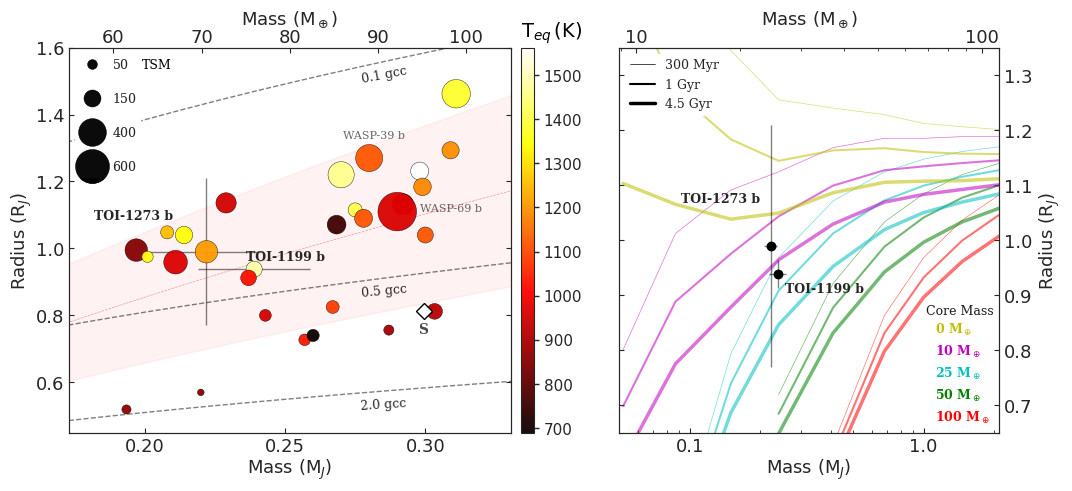

In [588]:
# lets replot the mass vs radius side by side with mass vs tsm
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), gridspec_kw={"width_ratios":[1.4,1]})
fig.subplots_adjust(wspace=0.04)
g = axes[0].scatter(tsm_df['pl_massj'], tsm_df['pl_radj'], c=tsm_df['pl_eqt'], 
                    cmap='hot', s=tsm_df['tsm'], edgecolors='k', linewidths=0.3, alpha=0.95)
                    
axes[0].set_xlabel('Mass (M$_{J}$)', fontsize=13, labelpad=1)
axes[0].set_ylabel('Radius (R$_{J}$)', fontsize=13, labelpad=1)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios1, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios2, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios5, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios7, color='red', linewidth=0.5, linestyle="--", alpha=0.4, zorder=-1)
axes[0].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[0].set_xticks([0.20, 0.25, 0.30])
axes[0].fill_between(masas*u.M_earth.to(u.M_jup), np.asarray(radios7)-np.asarray(radios7err), np.asarray(radios7)+np.asarray(radios7err), 
                  color='red', alpha=0.05, zorder=-1)
axes[0].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
axes[0].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
axes[0].plot([95.16*u.M_earth.to(u.M_jup)], [0.8145], marker='D', ls='none', ms=8, color='white', markeredgecolor='k', markeredgewidth=1, alpha=1)
axes[0].text(94.50*u.M_earth.to(u.M_jup), 0.745, 'S', fontsize=10, alpha=0.7,  weight='bold', fontfamily='serif',  color='k')
axes[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
axes3 = axes[0].twiny()
axes3.set_xlabel("Mass (M$_\oplus$)", fontsize=13, labelpad=2.5)
axes3.scatter(tsm_df1['pl_radj']*u.M_earth.to(u.M_jup), tsm_df1['pl_masse'], s=0, edgecolors='none', alpha=0.01, zorder=10)
axes3.tick_params(axis='both', which='both', left=True, bottom=False, top=True, right=True, direction='in', labelsize=13, pad=1)
cbar = fig.colorbar(g, ax=axes[0], aspect=30, pad=0.02) #, location='left
cbar.ax.tick_params(labelsize=11, width=1)
#cbar.set_label(label='Equilibrium Temperature', fontsize=13, labelpad=5)
axes3.set_ylim(0.45,1.6)
axes3.set_xlim(55, 105)
axes3.text(75, 0.965, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes3.text(57.8, 1.088, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')
axes3.text(88, 1.495, '0.1 gcc', fontsize=9, rotation=11., alpha=0.85, fontfamily='serif', color='k')
axes3.text(88, 0.857, '0.5 gcc', fontsize=9, rotation=5.5, alpha=0.85, fontfamily='serif', color='k')
axes3.text(88, 0.52, '2.0 gcc', fontsize=9, rotation=3.8, alpha=0.85, fontfamily='serif', color='k')
# kw = dict(prop="sizes", num=4, color='k')
legend1 = axes[0].legend(*g.legend_elements("sizes", num=[50,150,400,600]), prop=dict(family='serif', size=9), frameon=True, edgecolor='w', 
                    loc="upper left", fontsize=9, title_fontsize=9, framealpha=0.8, 
                    borderpad=0.3, labelspacing=1.6, handletextpad=0.6, borderaxespad=0.5)
axes[0].add_artist(legend1)
axes[0].text(0.199, 1.5392, 'TSM', fontsize=9, weight='normal', fontfamily='serif', color='k')
#axes[0].legend(*g.legend_elements("sizes", num=4))
lws = [0.5,1.5,2.5]
colors = ['y', 'm', 'c', 'g', 'r']
alphas = 0.55

axes[1].plot(age300myr_0045_0core[0], age300myr_0045_0core[1], color=colors[0], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_10core[0], age300myr_0045_10core[1], color=colors[1], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_25core[0], age300myr_0045_25core[1], color=colors[2], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_50core[0], age300myr_0045_50core[1], color=colors[3], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_100core[0], age300myr_0045_100core[1], color=colors[4], linewidth=lws[0], linestyle="-", alpha=alphas)

axes[1].plot(age1gyr_0045_0core[0], age1gyr_0045_0core[1], color=colors[0], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_10core[0], age1gyr_0045_10core[1], color=colors[1], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_25core[0], age1gyr_0045_25core[1], color=colors[2], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_50core[0], age1gyr_0045_50core[1], color=colors[3], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_100core[0], age1gyr_0045_100core[1], color=colors[4], linewidth=lws[1], linestyle="-", alpha=alphas)

axes[1].plot(age45gyr_0045_0core[0], age45gyr_0045_0core[1], color=colors[0], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_10core[0], age45gyr_0045_10core[1], color=colors[1], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_25core[0], age45gyr_0045_25core[1], color=colors[2], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_50core[0], age45gyr_0045_50core[1], color=colors[3], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_100core[0], age45gyr_0045_100core[1], color=colors[4], linewidth=lws[2], linestyle="-", alpha=alphas)

axes[1].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[1].set_ylim(0.65, 1.35)
axes[1].scatter(masa_1199[0].value, radio_1199[0].value, marker='o', s=50, linewidth=0, c='k', edgecolors='k', zorder=20)
axes[1].scatter(masa_1273[0].value, radio_1273[0].value, marker='o', s=50, linewidth=0, c='k', edgecolors='k', zorder=20)
axes[1].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=10)
axes[1].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1273[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=10)
axes[1].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
axes[1].set_xlabel('Mass (M$_{J}$)', fontsize=13, labelpad=1)
axes[1].set_ylabel('Radius (R$_{J}$)', fontsize=13, labelpad=4)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].yaxis.set_ticks_position('both')
axes4 = axes[1].twiny()
axes4.set_xscale('log')
# axes4.set_xlim(55, 105)
axes[1].set_xlim(0.05, 2.1)
axes4.scatter(masa_1199[0].to(u.M_earth).value, radio_1199[0].value, s=0, c='w', edgecolors='k', zorder=10)
axes4.set_xlabel("Mass (M$_\oplus$)", fontsize=13, labelpad=2.5)
axes4.tick_params(axis='both', which='both', left=True, bottom=False, top=True, right=True, direction='in', labelsize=13, pad=1)
axes4.text(27, 0.905, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes4.text(13.5, 1.068, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')

from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
formatter = ScalarFormatter()
axes4.xaxis.set_major_formatter(formatter)
custom_lines = [Line2D([0], [0], color='k', lw=0.5),
                Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='k', lw=2.5)]
axes[1].legend(custom_lines, ['300 Myr', '1 Gyr', '4.5 Gyr'], prop=dict(family='serif', weight='normal', size=9), 
                loc='upper left', frameon=True, edgecolor='w', framealpha=1)
axes[1].set_xscale('log')
axes[1].text(1.02, 0.865, 'Core Mass', color='k', fontsize=9, weight='light', fontfamily='serif', alpha=0.9)
axes[1].text(1.12, 0.67, '100 M$_\oplus$', color=colors[4], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.71, '50 M$_\oplus$', color=colors[3], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.75, '25 M$_\oplus$', color=colors[2], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.79, '10 M$_\oplus$', color=colors[1], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.83, '0 M$_\oplus$', color=colors[0], fontsize=9, weight='semibold', fontfamily='serif')
axes[0].text(0.334, 1.63, 'T$_{eq}\,$(K)', color='k', fontsize=14, fontfamily='sans-serif')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].set_xticks([0.1, 1.0])
axes3.text(86, 1.33, 'WASP-39 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
#axes3.text(95.5, 1.52, 'WASP-20 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
axes3.text(94.8, 1.11, 'WASP-69 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
#plt.savefig('mass_radio_tsm_age.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

In [589]:
# 5353 es WASP-20 b, el amarillito de arriba a la derecha de todo
# 5407 es WASP-69 b el grande de mayor TSM, 772
# 5371 es WASP-39 b, el rojito arriba a la izquierda de wasp-69 b
# 5291 es WASP-131 b, el amarillito al lado de wasp-39 b

In [590]:
parecidos[(parecidos['pl_radj'] > 1.19) & (parecidos['pl_radj'] < 1.4) & (parecidos['pl_masse'] > 83) & (parecidos['pl_masse'] < 90)]

,pl_name,default_flag,soltype,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_rotperr2,st_rotplim,sy_dist,sy_disterr1,sy_disterr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,tsm_err,tsm
5291,WASP-131 b,1,Published Confirmed,5.322023,0.000005,-0.000005,0.0,0.0607,0.0009,-0.0009,...,NaN,NaN,200.075,2.659,-2.591,8.895001,0.027,-0.027,(3.6+/-0.6)e+02,355.542063
5371,WASP-39 b,1,Published Confirmed,4.055259,0.000009,-0.000009,0.0,0.0486,0.0005,-0.0005,...,NaN,NaN,213.982,1.760,-1.731,10.663000,0.024,-0.024,379.9960543411044+/-nan,379.996054


In [591]:
parecidos['pl_name'] 

116        CoRoT-8 b
318       HAT-P-12 b
326       HAT-P-18 b
327       HAT-P-19 b
348       HAT-P-38 b
362       HAT-P-51 b
425      HATS-48 A b
427         HATS-5 b
4756       NGTS-12 b
4771        NGTS-5 b
4964      TOI-1268 b
4970      TOI-1296 b
5027      TOI-1842 b
5034      TOI-2000 c
5089      TOI-2567 b
5116      TOI-3629 b
5120      TOI-3757 b
5173       TOI-532 b
5291      WASP-131 b
5305      WASP-147 b
5306      WASP-148 b
5317    WASP-160 B b
5340      WASP-181 b
5353       WASP-20 b
5354       WASP-21 b
5371       WASP-39 b
5407       WASP-69 b
5424       WASP-83 b
Name: pl_name, dtype: object

# Age 

In [592]:
def age(rhk, rhkerr):
    logrhk = ufloat(rhk, rhkerr)
    age = -38.053-17.912*logrhk-1.6675*logrhk**2
    age2 = 10**age
    return age2/1e9 # Gyr
# relation based on Mamajek & Hillenbrand (2008)

In [593]:
print('Age of TOI-1199', age(-5.1, 0.2))

Age of TOI-1199 8.4+/-3.5


In [594]:
age(-5.1, 0.2)

8.443548454820819+/-3.513167376890624

In [595]:
age(-5.0, 0.2)

6.59933234263572+/-3.7593727058493642

# Weighted averages stellar param

In [596]:
# for n measurements with uncertainties, calculate the weighted average and uncertainty
def weighted_average(values, uncertainties):
    weights = 1/uncertainties**2
    average = np.sum(values*weights)/np.sum(weights)
    uncertainty = np.sqrt(1/np.sum(weights))
    return ufloat(average, uncertainty)

In [597]:
# teff toi-1199
teff = weighted_average(np.asarray([5700, 5721]), np.asarray([66,50]))
teff

5713.342473745624+/-39.85460740770051

In [598]:
# teff toi-1273
teff2 = weighted_average(np.asarray([5697, 5693]), np.asarray([62,50]))
teff2

5694.576292559899+/-38.92065197376647

In [599]:
# logg toi-1199
logg = weighted_average(np.asarray([4.15, 4.19, 4.25]), np.asarray([0.12, 0.03, 0.10]))
logg

4.192516268980477+/-0.02794478596995734

In [600]:
# logg toi-1273
logg2 = weighted_average(np.asarray([4.34, 4.38, 4.35]), np.asarray([0.10, 0.03, 0.10]))
logg2

4.374661016949152+/-0.027617238536949702

In [601]:
# feh toi-1199
feh = weighted_average(np.asarray([0.418, 0.50]), np.asarray([0.045,0.08]))
feh

0.4377091988130563+/-0.039220899170604714

In [602]:
# feh toi-1273
feh2 = weighted_average(np.asarray([0.066, 0.10]), np.asarray([0.042,0.08]))
feh2

0.07334639882410583+/-0.03718671191919363

In [603]:
# vsini toi-1199
vsini = weighted_average(np.asarray([3.3, 3.4]), np.asarray([1.0,0.5]))
vsini

3.38+/-0.4472135954999579

In [604]:
# vsini toi-1273
vsini2 = weighted_average(np.asarray([2.2, 2.9]), np.asarray([1.0,0.5]))
vsini2

2.7600000000000002+/-0.4472135954999579

In [605]:
# age toi-1199
age = weighted_average(np.asarray([4.2, 4.2]), np.asarray([0.2, 0.3]))
age

4.2+/-0.16641005886756874

In [606]:
# age toi-1273
age2 = weighted_average(np.asarray([2.1, 4.5]), np.asarray([np.sqrt(0.5**2+2**2),np.sqrt(1.5**2+2**2)]))
age2

3.0714285714285716+/-1.5905225257008795

In [607]:
# mass_max = K*np.sqrt(1-ecc**2)*(period*u.day.to(u.second)*(m_star*u.M_sun.to(u.kg))**2/(2*np.pi*constants.G))**(1/3)

# Metalicity plots

In [608]:
met1 = parecidos[['pl_masse', 'pl_massj', 'pl_radj', 'pl_dens', 'st_met', 'st_age']]

new_row = pd.DataFrame({'pl_masse': masa_1199[0].to(u.M_earth).value, 'pl_massj': masa_1199[0], 'pl_radj': radio_1199[0].value, 'pl_dens': dens_1199[0], 'st_met': met_1199[0], 'st_age': age_1199[0]}, index=[0])
met2 = pd.concat([new_row, met1.loc[:]]).reset_index(drop=True)
new_row2 = pd.DataFrame({'pl_masse': masa_1273[0].to(u.M_earth).value, 'pl_massj': masa_1273[0], 'pl_radj': radio_1273[0].value, 'pl_dens': dens_1273[0], 'st_met': met_1273[0], 'st_age': age_1273[0]}, index=[0])
met = pd.concat([new_row2, met2.loc[:]]).reset_index(drop=True)


In [609]:
len(tsm_df)

29

In [610]:
# from PIL import Image
# labelfont=11

# fig, axes = plt.subplots(ncols=2, figsize=(12, 6.5), gridspec_kw={"width_ratios":[1,1]})
# fig.subplots_adjust(wspace=0.16)

# # sort tsm_df by 'tsm' ascending so the big points are plotted first
# tsm_df = tsm_df.sort_values(by=['tsm'], ascending=False).reset_index(drop=True)

# g = axes[0].scatter(tsm_df['pl_massj'], tsm_df['pl_radj'], c=tsm_df['pl_eqt'], 
#                     cmap='hot', s=tsm_df['tsm'], edgecolors='k', linewidths=0.3, alpha=1)
                    
# axes[0].set_xlabel('Mass (M$_{J}$)', fontsize=labelfont, labelpad=1)
# axes[0].set_ylabel('Radius (R$_{J}$)', fontsize=labelfont, labelpad=1)
# axes[0].plot(masas*u.M_earth.to(u.M_jup), radios1, color='black', linewidth=1, linestyle="--", alpha=0.5)
# axes[0].plot(masas*u.M_earth.to(u.M_jup), radios2, color='black', linewidth=1, linestyle="--", alpha=0.5)
# axes[0].plot(masas*u.M_earth.to(u.M_jup), radios5, color='black', linewidth=1, linestyle="--", alpha=0.5)
# axes[0].plot(masas*u.M_earth.to(u.M_jup), radios7, color='red', linewidth=0.5, linestyle="--", alpha=0.4, zorder=-1)
# axes[0].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
# axes[0].set_xticks([0.20, 0.25, 0.30])
# axes[0].fill_between(masas*u.M_earth.to(u.M_jup), np.asarray(radios7)-np.asarray(radios7err), np.asarray(radios7)+np.asarray(radios7err), 
#                   color='red', alpha=0.05, zorder=-1)
# axes[0].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
#              xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
#             markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
# axes[0].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
#              xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
#             markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
# # axes[0].plot([95.16*u.M_earth.to(u.M_jup)], [0.8145], marker='D', ls='none', ms=8, color='gray', markeredgecolor='k', markeredgewidth=1, alpha=1)
# # axes[0].text(94.50*u.M_earth.to(u.M_jup), 0.745, 'S', fontsize=10, alpha=0.7,  weight='bold', fontfamily='serif',  color='k')
# axes[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=labelfont)
# axes[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=labelfont)
# cbar = fig.colorbar(g, ax=axes[0], aspect=30, pad=0.02, location='top') #, location='left
# cbar.ax.tick_params(labelsize=10, width=1)
# cbar.set_label(label='T$_{eq}\,$(K)', fontsize=labelfont,  fontfamily='sans-serif', labelpad=5)
# axes[0].set_yticks([0.5, 0.7, 0.9, 1.1, 1.3, 1.5])
# axes[0].set_ylim(0.45, 1.60)
# axes[0].text(75/317.8, 0.965, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
# axes[0].text(57.8/317.8, 1.088, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')
# axes[0].text(88/317.8, 1.495, '0.1 gcc', fontsize=9, rotation=11., alpha=0.85, fontfamily='serif', color='k')
# axes[0].text(88/317.8, 0.857, '0.5 gcc', fontsize=9, rotation=5.5, alpha=0.85, fontfamily='serif', color='k')
# axes[0].text(88/317.8, 0.52, '2.0 gcc', fontsize=9, rotation=3.8, alpha=0.85, fontfamily='serif', color='k')
# legend1 = axes[0].legend(*g.legend_elements("sizes", num=[50,150,400,600]), prop=dict(family='serif', size=9), frameon=True, edgecolor='w', 
#                     loc="upper left", fontsize=9, title_fontsize=9, framealpha=0.8, 
#                     borderpad=0.3, labelspacing=1.6, handletextpad=0.6, borderaxespad=0.5)
# axes[0].add_artist(legend1)
# axes[0].text(0.2, 1.52, 'TSM', fontsize=9, weight='normal', fontfamily='serif', color='k')
# axes[0].text(86/317.8, 1.33, 'WASP-39 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
# axes[0].text(94.8/317.8, 1.11, 'WASP-69 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
# # draw an arrow to indicate the position of Saturn
# axes[0].annotate('', xy=(94.8/317.8-0.001, 1.09), xycoords='data', xytext=(94.8/317.8+0.01-0.003, 1.09), textcoords='data',
#             arrowprops=dict(arrowstyle="->", color='k', linewidth=0.7, alpha=0.5))
# lws = [0.5,1.5,2.5]
# colors = ['y', 'm', 'c', 'g', 'r']
# alphas = 0.55
# # add the image im to the first plot at the position of Saturn
# im = Image.open('./saturn.png')
# from scipy import ndimage
# rotated_im = ndimage.rotate(im, 44)
# axes[0].imshow(rotated_im, extent=[0.2994-0.009, 0.2994+0.009, 0.7480, 0.8810], aspect='auto', zorder=-1000, alpha=1) #0.2994, 0.8145

# f = axes[1].scatter(met['pl_massj'], met['pl_radj'], c=met['st_met'], 
#                     cmap='gist_rainbow', s=50, edgecolors='k', linewidths=0.3, alpha=0.95) #s=met['pl_dens']*130
# axes[1].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
#              xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
#             markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
# axes[1].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
#              xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
#             markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
# axes[1].plot(masas*u.M_earth.to(u.M_jup), radios1, color='black', linewidth=1, linestyle="--", alpha=0.5)
# axes[1].plot(masas*u.M_earth.to(u.M_jup), radios2, color='black', linewidth=1, linestyle="--", alpha=0.5)
# axes[1].plot(masas*u.M_earth.to(u.M_jup), radios5, color='black', linewidth=1, linestyle="--", alpha=0.5)
# axes[1].text(88/317.8, 1.495, '0.1 gcc', fontsize=9, rotation=11., alpha=0.85, fontfamily='serif', color='k')
# axes[1].text(88/317.8, 0.857, '0.5 gcc', fontsize=9, rotation=5.5, alpha=0.85, fontfamily='serif', color='k')
# axes[1].text(88/317.8, 0.52, '2.0 gcc', fontsize=9, rotation=3.8, alpha=0.85, fontfamily='serif', color='k')
# axes[1].text(75/317.8, 0.965, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
# axes[1].text(57.8/317.8, 1.088, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')
# # axes[1].plot([95.16*u.M_earth.to(u.M_jup)], [0.8145], marker='D', ls='none', ms=8, color='gray', markeredgecolor='k', markeredgewidth=1, alpha=1)
# # axes[1].text(94.50*u.M_earth.to(u.M_jup), 0.745, 'S', fontsize=10, alpha=0.7,  weight='bold', fontfamily='serif',  color='k')
# axes[1].imshow(rotated_im, extent=[0.2994-0.009, 0.2994+0.009, 0.7480, 0.8810], aspect='auto', zorder=-1000, alpha=1) #0.2994, 0.8145
# axes[1].set_xlabel('Mass (M$_{J}$)', fontsize=labelfont, labelpad=1)
# axes[1].set_ylabel('Radius (R$_{J}$)', fontsize=labelfont, labelpad=1)
# axes[1].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
# axes[1].set_ylim(0.45, 1.60)
# axes[1].set_yticks([0.5, 0.7, 0.9, 1.1, 1.3, 1.5])
# axes[1].set_xticks([0.20, 0.25, 0.30])
# axes[1].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=labelfont)
# axes[1].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=labelfont)
# cbar2 = fig.colorbar(f, ax=axes[1], aspect=30, pad=0.02, location='top') #, location='left
# cbar2.ax.tick_params(labelsize=10, width=1)
# cbar2.set_label(label='Stellar Metalicity (dex)', fontsize=labelfont,  fontfamily='sans-serif', labelpad=5)
# #plt.savefig('metal.png', dpi=400, bbox_inches='tight', facecolor='white')
# plt.show()

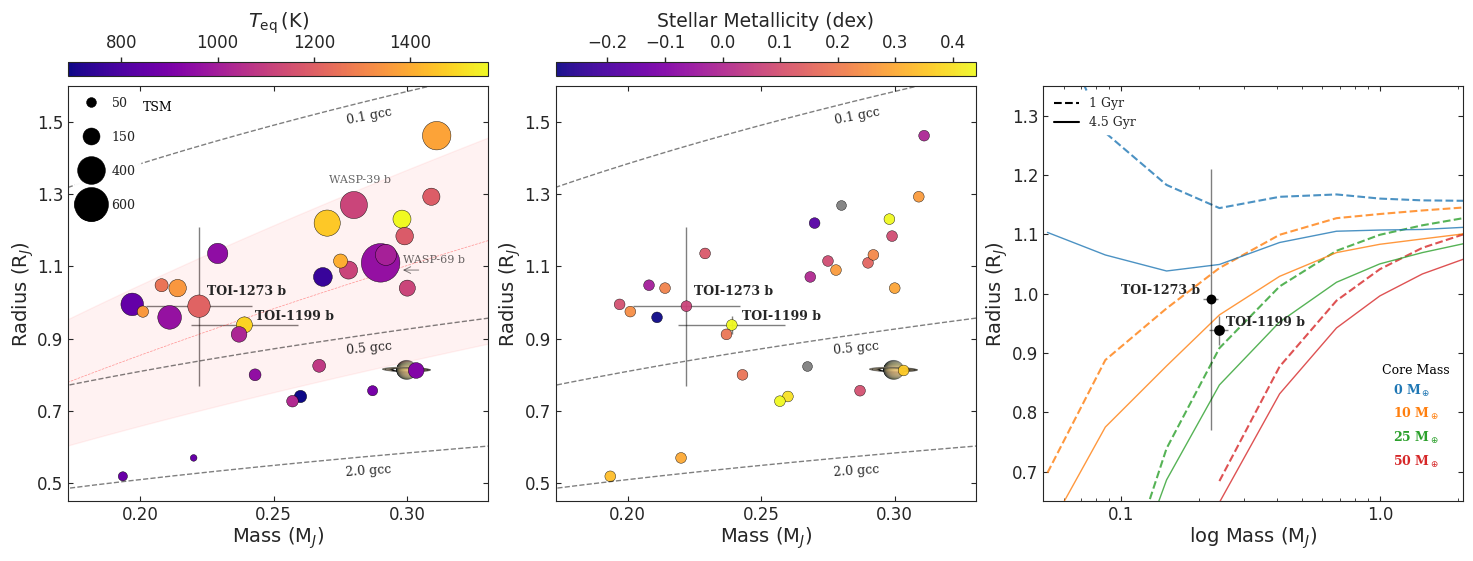

In [611]:
from PIL import Image
labelfont=12
from matplotlib.colors import LinearSegmentedColormap
whites = LinearSegmentedColormap.from_list('whites', [(255, 255, 255), (255, 255, 255), (255, 255, 255)], N=3)

fig, axes = plt.subplots(ncols=3, figsize=(18, 6.5), gridspec_kw={"width_ratios":[1,1,1]})
fig.subplots_adjust(wspace=0.16)

# sort tsm_df by 'tsm' ascending so the big points are plotted first
tsm_df = tsm_df.sort_values(by=['tsm'], ascending=False).reset_index(drop=True)
g = axes[0].scatter(tsm_df['pl_massj'], tsm_df['pl_radj'], c=tsm_df['pl_eqt'], 
                    cmap='plasma', s=tsm_df['tsm'], edgecolors='k', linewidths=0.3, alpha=1)
                    
axes[0].set_xlabel('Mass (M$_{J}$)', fontsize=labelfont+2, labelpad=1)
axes[0].set_ylabel('Radius (R$_{J}$)', fontsize=labelfont+2, labelpad=1)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios1, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios2, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios5, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios7, color='red', linewidth=0.5, linestyle="--", alpha=0.4, zorder=-1)
axes[0].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[0].set_xticks([0.20, 0.25, 0.30])
axes[0].fill_between(masas*u.M_earth.to(u.M_jup), np.asarray(radios7)-np.asarray(radios7err), np.asarray(radios7)+np.asarray(radios7err), 
                  color='red', alpha=0.05, zorder=-1)
axes[0].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
axes[0].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
axes[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=labelfont)
axes[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=labelfont)
cbar = fig.colorbar(g, ax=axes[0], aspect=30, pad=0.02, location='top') #, location='left
cbar.ax.tick_params(labelsize=labelfont, width=1)
cbar.set_label(label='$T_\mathrm{eq}\,$(K)', fontsize=labelfont+2,  fontfamily='sans-serif', labelpad=5)
axes[0].set_yticks([0.5, 0.7, 0.9, 1.1, 1.3, 1.5])
axes[0].set_ylim(0.45, 1.60)
axes[0].text(0.243, 0.952, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes[0].text(0.225, 1.02, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')
axes[0].text(88/317.8, 1.495, '0.1 gcc', fontsize=9, rotation=11., alpha=0.85, fontfamily='serif', color='k')
axes[0].text(88/317.8, 0.857, '0.5 gcc', fontsize=9, rotation=5.5, alpha=0.85, fontfamily='serif', color='k')
axes[0].text(88/317.8, 0.52, '2.0 gcc', fontsize=9, rotation=3.8, alpha=0.85, fontfamily='serif', color='k')
legend1 = axes[0].legend(*g.legend_elements("sizes", num=[50,150,400,600]), prop=dict(family='serif', size=9), frameon=True, edgecolor='w', 
                    loc="upper left", fontsize=9, title_fontsize=9, framealpha=0.8, 
                    borderpad=0.3, labelspacing=1.6, handletextpad=0.6, borderaxespad=0.5)
axes[0].add_artist(legend1)
axes[0].text(0.201, 1.53, 'TSM', fontsize=9, weight='normal', fontfamily='serif', color='k')
axes[0].text(86/317.8, 1.33, 'WASP-39 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
axes[0].text(94.8/317.8, 1.11, 'WASP-69 b', color='k', fontsize=8, weight='regular', fontfamily='serif', alpha=0.6)
# draw an arrow to indicate the position of Saturn
axes[0].annotate('', xy=(94.8/317.8-0.001, 1.09), xycoords='data', xytext=(94.8/317.8+0.01-0.003, 1.09), textcoords='data',
            arrowprops=dict(arrowstyle="->", color='k', linewidth=0.7, alpha=0.5))
# add the image im to the first plot at the position of Saturn
im = Image.open('./saturn.png')
from scipy import ndimage
rotated_im = ndimage.rotate(im, 44)
axes[0].imshow(rotated_im, extent=[0.2994-0.009, 0.2994+0.009, 0.7480, 0.8810], aspect='auto', zorder=-1000, alpha=1) #0.2994, 0.8145

f = axes[1].scatter(tsm_df['pl_massj'], tsm_df['pl_radj'], c=tsm_df['st_met'], 
                    cmap='plasma', s=60, edgecolors='k', linewidths=0.3, alpha=0.95) #s=met['pl_dens']*130
# agrego los dos que no tienen metalicidad
axes[1].scatter(tsm_df['pl_massj'][2], tsm_df['pl_radj'][2], c='gray', s=50, edgecolors='k', linewidths=0.3, alpha=0.95)
axes[1].scatter(tsm_df['pl_massj'][21], tsm_df['pl_radj'][21], c='gray', s=50, edgecolors='k', linewidths=0.3, alpha=0.95)

axes[1].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
axes[1].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
axes[1].plot(masas*u.M_earth.to(u.M_jup), radios1, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[1].plot(masas*u.M_earth.to(u.M_jup), radios2, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[1].plot(masas*u.M_earth.to(u.M_jup), radios5, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[1].text(88/317.8, 1.495, '0.1 gcc', fontsize=9, rotation=11., alpha=0.85, fontfamily='serif', color='k')
axes[1].text(88/317.8, 0.857, '0.5 gcc', fontsize=9, rotation=5.5, alpha=0.85, fontfamily='serif', color='k')
axes[1].text(88/317.8, 0.52, '2.0 gcc', fontsize=9, rotation=3.8, alpha=0.85, fontfamily='serif', color='k')
axes[1].text(0.243, 0.952, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes[1].text(0.225, 1.02, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')

axes[1].imshow(rotated_im, extent=[0.2994-0.009, 0.2994+0.009, 0.7480, 0.8810], aspect='auto', zorder=-1000, alpha=1) #0.2994, 0.8145
axes[1].set_xlabel('Mass (M$_{J}$)', fontsize=labelfont+2, labelpad=1)
axes[1].set_ylabel('Radius (R$_{J}$)', fontsize=labelfont+2, labelpad=1)
axes[1].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[1].set_ylim(0.45, 1.60)
axes[1].set_yticks([0.5, 0.7, 0.9, 1.1, 1.3, 1.5])
axes[1].set_xticks([0.20, 0.25, 0.30])
axes[1].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=labelfont)
axes[1].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=labelfont)
cbar2 = fig.colorbar(f, ax=axes[1], aspect=30, pad=0.02, location='top') 
cbar2.ax.tick_params(labelsize=labelfont, width=1)
cbar2.set_label(label='Stellar Metallicity (dex)', fontsize=labelfont+1.5,  fontfamily='sans-serif', labelpad=5)

lws = [1.5,1.5,1]
lss = ['--', '-', '-']
# colors = ['k', 'r', 'b', 'c', 'g']
mapss = 'tab20c'
colors = sns.color_palette("tab10")[0:4]
# colors = [tab20[0], tab20[1], tab20[2], tab20[3], tab20[4]]
# colors = [plt.colormaps.get_cmap(mapss)(0), plt.colormaps.get_cmap(mapss)(0.01), 
#           plt.colormaps.get_cmap(mapss)(0.2), plt.colormaps.get_cmap(mapss)(0.3), plt.colormaps.get_cmap(mapss)(1.5)]
alphas = 0.80

axes[2].plot(age1gyr_0045_0core[0], age1gyr_0045_0core[1], color=colors[0], linewidth=lws[1], linestyle="--", alpha=alphas)
axes[2].plot(age1gyr_0045_10core[0], age1gyr_0045_10core[1], color=colors[1], linewidth=lws[1], linestyle="--", alpha=alphas)
axes[2].plot(age1gyr_0045_25core[0], age1gyr_0045_25core[1], color=colors[2], linewidth=lws[1], linestyle="--", alpha=alphas)
axes[2].plot(age1gyr_0045_50core[0], age1gyr_0045_50core[1], color=colors[3], linewidth=lws[1], linestyle="--", alpha=alphas)
axes[2].plot(age45gyr_0045_0core[0], age45gyr_0045_0core[1], color=colors[0], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[2].plot(age45gyr_0045_10core[0], age45gyr_0045_10core[1], color=colors[1], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[2].plot(age45gyr_0045_25core[0], age45gyr_0045_25core[1], color=colors[2], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[2].plot(age45gyr_0045_50core[0], age45gyr_0045_50core[1], color=colors[3], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[2].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[2].set_ylim(0.65, 1.35)
axes[2].scatter(masa_1199[0].value, radio_1199[0].value, marker='o', s=60, linewidth=0, c='k', edgecolors='k', zorder=20)
a = axes[2].scatter(tsm_df['pl_massj'], tsm_df['pl_radj'], c=tsm_df['st_met'], 
                    cmap='plasma', s=50, linewidths=0.1, alpha=0.0)
axes[2].scatter(masa_1273[0].value, radio_1273[0].value, marker='o', s=50, linewidth=0, c='k', edgecolors='k', zorder=20)
axes[2].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=10)
axes[2].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1273[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=10)
axes[2].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=labelfont)
axes[2].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=labelfont)
axes[2].set_xlabel('log$~$Mass (M$_{J}$)', fontsize=labelfont+2, labelpad=1)
axes[2].set_ylabel('Radius (R$_{J}$)', fontsize=labelfont+2, labelpad=1)
axes[2].set_xlim(0.05, 2.1)
axes[2].text(0.254, 0.9454, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes[2].text(0.1, 1.0, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')
custom_lines = [Line2D([0], [0], color='k', ls='--', lw=1.5),
                Line2D([0], [0], color='k', ls='-', lw=1.5)]
axes[2].legend(custom_lines, ['1 Gyr', '4.5 Gyr'], prop=dict(family='serif', weight='normal', size=9), 
                loc='upper left', frameon=True, edgecolor='w', framealpha=1)
axes[2].set_xscale('log')
axes[2].text(1.02, 0.865, 'Core Mass', color='k', fontsize=9, weight='light', fontfamily='serif')
axes[2].text(1.12, 0.71, '50 M$_\oplus$', color=colors[3], fontsize=9, weight='semibold', fontfamily='serif')
axes[2].text(1.12, 0.75, '25 M$_\oplus$', color=colors[2], fontsize=9, weight='semibold', fontfamily='serif')
axes[2].text(1.12, 0.79, '10 M$_\oplus$', color=colors[1], fontsize=9, weight='semibold', fontfamily='serif')
axes[2].text(1.12, 0.83, '0 M$_\oplus$', color=colors[0], fontsize=9, weight='semibold', fontfamily='serif')
axes[2].xaxis.set_major_formatter(formatter)
axes[2].set_xticks([0.1, 1.0])
cbar3 = fig.colorbar(a, ax=axes[2], aspect=30, pad=0.02, location='top') 
cbar3.ax.tick_params(labelsize=10, width=1)
cbar3.set_label(label='', fontsize=labelfont,  fontfamily='sans-serif', labelpad=5)
cbar3.set_ticks([])
cbar3.outline.set_visible(False)
#plt.savefig('context.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

In [612]:
# calculate the pearson correlation between the two variables tsm_df['pl_radk'] and tsm_df['st_met']
from scipy.stats import pearsonr
tsm_df_nonan = tsm_df.dropna(subset=['pl_radj', 'st_met'])
corr, _ = pearsonr(np.log(tsm_df_nonan['pl_radj']), tsm_df_nonan['st_met'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.386


# Jitter + error

In [613]:
# toi-1199
jitter_1199 = 10.2
rv_sigma_1199 = 4.5
# toi-1273
jitter_1273 = 7.5
rv_sigma_1273 = 5.4

In [614]:
# combined error
print(np.sqrt(jitter_1199**2 + rv_sigma_1199**2))
print(np.sqrt(jitter_1273**2 + rv_sigma_1273**2))

11.148542505637227
9.241753080449618


In [615]:
def limit_mass(K, ecc, period, m_star):
    return K*np.sqrt(1-ecc**2)*(period*u.day.to(u.second)*(m_star*u.M_sun.to(u.kg))**2/(2*np.pi*constants.G))**(1/3)*u.kg.to(u.M_jup)

# compute the mass upper limit from 3 sigma upper limit on K

In [616]:
# toi-1199
limit_mass(33,0.0,1800,1.23)

2.2674103382422888

In [617]:
# toi-1273
limit_mass(23,0.0,1800,1.23)

1.580316296350686